<a href="https://colab.research.google.com/github/RamiAmasha31/ABM-applied_mathmatics/blob/main/Multiple_Strains_first_VERSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Strains

# Parameters

In [70]:
import numpy as np

def random_days1(mean, std):
    return max(0, int(np.random.normal(mean, std)))

num_agents = 1000
num_strains = 3
infected_at_start = [50, 1, 1]  # Number of initially infected agents for each strain
infection_params = [(90, 5), (30, 7), (50, 6)]  # (mean, std) for infection periods for each strain
immunity_params = [(180, 10), (90, 8), (150, 12)]  # (mean, std) for immunity periods for each strain
#infection_probabilities = [0.5,0.7, 0.8]
infected_per_birth_duration = [1, 1, 1]
after_recovery_factors = [0.2, 0.2, 0.2]
R0 = [1.5,2, 1.5]
number_of_interactions_per_day_per_agent = 1 / 10
infection_probabilities=[0]*num_strains
# Loop through each strain's infection parameters
for idx, (mean, std) in enumerate(infection_params):
    TMP = random_days1(mean, std) * number_of_interactions_per_day_per_agent
    infection_probabilities[idx] = float(R0[idx]) / TMP
simulation_duration1 = 30000
birth_rate_yearly = 0.3
birth_duration = 365
birth_interval = 365
carrying_capacity = 1000


#Agent class

In [48]:
import numpy as np
import random

class Agent:
    def __init__(self, num_strains, infection_params, immunity_params,infection_probabilities):
        self.infected = [False] * num_strains  # List to track infection status for each strain
        self.immune = [False] * num_strains  # List to track immunity status for each strain
        self.remaining_days_of_infection = [self.random_days(mean, std) for mean, std in infection_params]
        self.remaining_days_of_immunity = [self.random_days(mean, std) for mean, std in immunity_params]
        self.susceptible = True
        self.infection_probabilities= infection_probabilities
    def random_days(self, mean, std):
        return max(0, int(np.random.normal(mean, std)))


#Picking two random agents

In [49]:
import random
def PickTwoAgentsWithContacts(numAgents):
    """
    Randomly selects two different agent indices from the range [0, numAgents-1]
    with a probability of being in contact.

    Parameters:
    - numAgents (int): The total number of agents.
    - contact_prob (float): The probability of two agents being in contact.

    Returns:
    - tuple: A tuple containing two distinct agent indices.
    """
    # Randomly select two initial indices
    index1 = random.randint(0, numAgents - 1)
    index2 = random.randint(0, numAgents - 1)

    # Ensure the selected indices are different
    while index1 == index2 :
        index1 = random.randint(0, numAgents - 1)
        index2 = random.randint(0, numAgents - 1)

    return index1, index2

## `start_step` Function



In [50]:
import numpy as np
import random


def start_step(number_of_agents, num_strains, infected_at_start, infection_params, immunity_params,infection_probabilities):
    if sum(infected_at_start) > number_of_agents:
        raise ValueError("Total number of initially infected agents exceeds the total number of agents.")

    agents = []

    # Create agents
    for i in range(number_of_agents):
        agents.append(Agent(num_strains, infection_params, immunity_params,infection_probabilities))

    # Infect agents according to infected_at_start array
    for strain_index in range(num_strains):
        infected_indices = random.sample(range(number_of_agents), infected_at_start[strain_index])
        for index in infected_indices:
            agents[index].infected[strain_index] = True
            agents[index].remaining_days_of_infection[strain_index] = max(0, int(np.random.normal(infection_params[strain_index][0], infection_params[strain_index][1])))
            agents[index].susceptible = False

    return agents


Test Case for start step function

In [ ]:
#testing the start step function
# Example usage
number_of_agents = 7
num_strains = 3
infected_at_start = [2, 1, 3]  # Number of agents initially infected with each strain
infection_params = [(10, 2), (12, 3), (8, 1)]  # Mean and std deviation for infection duration for each strain
immunity_params = [(30, 5), (25, 4), (20, 3)]  # Mean and std deviation for immunity duration for each strain
infection_probabilities = [0.3, 0.4, 0.2]  # Infection probabilities for each strain
agents = start_step(number_of_agents, num_strains, infected_at_start, infection_params, immunity_params, infection_probabilities)

# Print some information about the initial state of the agents
for i, agent in enumerate(agents):
    print(f"Agent {i}:")
    print(f"  Infected: {agent.infected}")
    print(f"  Remaining Days of Infection: {agent.remaining_days_of_infection}")
    print(f"  Immune: {agent.immune}")
    print(f"  Remaining Days of Immunity: {agent.remaining_days_of_immunity}")
    print(f"  Susceptible: {agent.susceptible}")
    print()

#infect function

In [52]:
import random
import numpy as np

def infect(agent1, agent2, infection_probabilities):
    for strain_index in range(len(infection_probabilities)):
        random_number = random.random()
        if not agent1.infected[strain_index] and agent2.infected[strain_index] and not agent1.immune[strain_index] and random_number < agent1.infection_probabilities[strain_index]:
            agent1.infected[strain_index] = True
            agent1.remaining_days_of_infection[strain_index] =max(0, int(np.random.normal(infection_params[strain_index][0], infection_params[strain_index][1])))
            agent1.susceptible = False
        elif not agent2.infected[strain_index] and agent1.infected[strain_index] and not agent2.immune[strain_index] and random_number < agent2.infection_probabilities[strain_index]:
            agent2.infected[strain_index] = True
            agent2.remaining_days_of_infection[strain_index] = max(0, int(np.random.normal(infection_params[strain_index][0], infection_params[strain_index][1])))
            agent2.susceptible = False

    return agent1, agent2


Test Case for infect function

In [53]:
# Test case
import random
import numpy as np

def test_infect(agent1, agent2, infection_probabilities):
    for strain_index in range(len(infection_probabilities)):
        if not agent1.infected[strain_index] and agent2.infected[strain_index] and not agent1.immune[strain_index] and infection_probabilities[strain_index] > 0.3:
            agent1.infected[strain_index] = True
            agent1.remaining_days_of_infection[strain_index] = max(0, int(np.random.normal(infection_params[strain_index][0], infection_params[strain_index][1])))
            agent1.susceptible = False
        elif not agent2.infected[strain_index] and agent1.infected[strain_index] and not agent2.immune[strain_index] and infection_probabilities[strain_index] > 0.3:
            agent2.infected[strain_index] = True
            agent2.remaining_days_of_infection[strain_index] = max(0, int(np.random.normal(infection_params[strain_index][0], infection_params[strain_index][1])))
            agent2.susceptible = False

    return agent1, agent2
def test_infect_function():
    num_strains = 2
    infection_params = [(5, 1), (7, 2)]  # Example infection parameters (mean, std) for each strain
    immunity_params = [(10, 3), (8, 2)]  # Example immunity parameters (mean, std) for each strain
    infection_probabilities = [0.4, 0.6]  # Example infection probabilities for each strain

    print("--- Test Case 1: Agent 2 infected with strain 0 infects Agent 1 ---")
    agent1 = Agent(num_strains, infection_params, immunity_params, infection_probabilities)
    agent2 = Agent(num_strains, infection_params, immunity_params, infection_probabilities)
    agent2.infected[0] = True
    agent1, agent2 = test_infect(agent1, agent2, infection_probabilities)
    print("Agent 1 Infected Status:", agent1.infected)
    print("Agent 2 Infected Status:", agent2.infected)

    print("--- Test Case 2: Agent 1 infected with strain 1 infects Agent 2 ---")
    agent1 = Agent(num_strains, infection_params, immunity_params, infection_probabilities)
    agent2 = Agent(num_strains, infection_params, immunity_params, infection_probabilities)
    agent1.infected[1] = True
    agent1, agent2 = test_infect(agent1, agent2, infection_probabilities)
    print("Agent 1 Infected Status:", agent1.infected)
    print("Agent 2 Infected Status:", agent2.infected)

    print("--- Test Case 3: Both agents already infected with strains 0 and 1 respectively ---")
    agent1 = Agent(num_strains, infection_params, immunity_params, infection_probabilities)
    agent2 = Agent(num_strains, infection_params, immunity_params, infection_probabilities)
    agent1.infected = [True, False]
    agent2.infected = [False, True]
    agent1, agent2 = test_infect(agent1, agent2, infection_probabilities)
    print("Agent 1 Infected Status:", agent1.infected)
    print("Agent 2 Infected Status:", agent2.infected)

    print("--- Test Case 4: Agent 1 and Agent 2 immune to their respective strains ---")
    agent1 = Agent(num_strains, infection_params, immunity_params, infection_probabilities)
    agent2 = Agent(num_strains, infection_params, immunity_params, infection_probabilities)
    agent1.immune = [True, False]
    agent2.immune = [False, True]
    agent1, agent2 = test_infect(agent1, agent2, infection_probabilities)
    print("Agent 1 Infected Status:", agent1.infected)
    print("Agent 2 Infected Status:", agent2.infected)

# Run the test cases
test_infect_function()

--- Test Case 1: Agent 2 infected with strain 0 infects Agent 1 ---
Agent 1 Infected Status: [True, False]
Agent 2 Infected Status: [True, False]
--- Test Case 2: Agent 1 infected with strain 1 infects Agent 2 ---
Agent 1 Infected Status: [False, True]
Agent 2 Infected Status: [False, True]
--- Test Case 3: Both agents already infected with strains 0 and 1 respectively ---
Agent 1 Infected Status: [True, True]
Agent 2 Infected Status: [True, True]
--- Test Case 4: Agent 1 and Agent 2 immune to their respective strains ---
Agent 1 Infected Status: [False, False]
Agent 2 Infected Status: [False, False]


#Birth And Death

In [54]:
import numpy as np

def Birth_death(agents, birth_pulse, birth_rate_yearly, birth_interval, birth_duration, new_born, deads,carrying_capacity):
    num_new_agents = 0
    num_dead_agents = 0
    b = 0.1
    m=(birth_rate_yearly-b)/int(carrying_capacity)



    # Check if the birth pulse matches the birth interval
    if birth_pulse % birth_interval < birth_duration:
        # Calculate the expected number of new agents over the birth duration
        expected_new_agents_over_duration = birth_rate_yearly * len(agents)

        # Generate the number of new agents using Poisson distribution
        num_new_agents = np.random.poisson(expected_new_agents_over_duration/birth_duration)

        # Create new agents with the specified parameters
        agents = create_new_agents(agents, num_new_agents, infected_per_birth_duration, infection_params, immunity_params, infection_probabilities)

    # Calculate daily death rate
    death_rate = m * len(agents) + b

    daily_death_rate=death_rate/birth_interval


    # Generate the number of dead agents using binomial distribution
    num_dead_agents = np.random.binomial(len(agents), daily_death_rate)

    # Remove dead agents
    agents = remove_dead_agents(agents, num_dead_agents)

    return agents, num_new_agents, num_dead_agents

Test Case for Birth_Death function

In [ ]:
import numpy as np

def test_Birth_death():
    # Define initial parameters for testing
    num_agents = 1000
    birth_pulse = 0
    birth_rate_yearly = 0.2
    birth_interval = 10
    birth_duration = 5
    carrying_capacity = 2000
    # Add initial values for new_born and deads
    new_born = [0] * birth_duration
    deads = [0] * birth_duration

    # Initialize agents
    agents = create_initial_agents(num_agents)  # Replace with your agent creation logic
    agents_after=agents
    # Test different scenarios
    for i in range(5):  # Example of testing over multiple scenarios
        print(f"Test Scenario {i + 1}:")

        # Call Birth_death function with required arguments
        agents_after, num_new_agents, num_dead_agents = Birth_death(agents, birth_pulse, birth_rate_yearly, birth_interval, birth_duration, new_born, deads, carrying_capacity)

        # Print results
        print(f"    Initial Agents:    {len(agents)-num_new_agents+num_dead_agents :>5}")
        print(f"    New Agents:        {num_new_agents:>5}")
        print(f"    Dead Agents:       {num_dead_agents:>5}")
        print(f"    Final Agents:      {len(agents_after):>5}")

        # Update agents for next iteration
        agents = agents_after
        print()  # Print an empty line for clarity between scenarios

    print("All test scenarios passed.")

# Helper function to create initial agents
def create_initial_agents(num_agents):
    return ["Agent"] * num_agents  # Replace with your agent creation logic

# Example function call
test_Birth_death()

Test Case for function Birth_Death for birth interval and birth duration parameters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Birth_death3(agents, birth_pulse, birth_rate_yearly, birth_interval, birth_duration, new_born, deads, carrying_capacity):
    num_new_agents = 0
    num_dead_agents = 0
    b = 0.1
    m = (birth_rate_yearly - b) / carrying_capacity

    # Check if the birth pulse matches the birth interval
    if birth_pulse % birth_interval < birth_duration:
        # Calculate the expected number of new agents over the birth duration
        expected_new_agents_over_duration = birth_rate_yearly * len(agents)

        # Generate the number of new agents using Poisson distribution
        num_new_agents = np.random.poisson(expected_new_agents_over_duration / birth_duration)

        # Create new agents with the specified parameters
        # Assuming create_new_agents function signature and logic
        agents = create_new_agents3(agents, num_new_agents)

    # Calculate daily death rate
    death_rate = m * len(agents) + b
    daily_death_rate = death_rate / birth_interval

    # Generate the number of dead agents using binomial distribution
    num_dead_agents = np.random.binomial(len(agents), daily_death_rate)

    # Remove dead agents
    agents = remove_dead_agents3(agents, num_dead_agents)

    return agents, num_new_agents, num_dead_agents

def create_new_agents3(agents, num_new_agents):
    # Replace this with your agent creation logic
    new_agents = ["New Agent"] * num_new_agents
    agents.extend(new_agents)
    return agents

def remove_dead_agents3(agents, num_dead_agents):
    # Replace this with your logic to remove dead agents
    if num_dead_agents > 0:
        agents = agents[:-num_dead_agents]
    return agents

def test_Birth_death2():
    # Define initial parameters for testing
    num_agents = 1000
    birth_pulse = 0
    birth_rate_yearly = 0.2
    carrying_capacity = 2000

    # Test different values for birth_interval and birth_duration
    test_cases = [
        {"birth_interval": 5, "birth_duration": 2},
        {"birth_interval": 10, "birth_duration": 5},
        {"birth_interval": 15, "birth_duration": 3}
    ]

    # Add initial values for new_born and deads
    max_duration = max([case["birth_duration"] for case in test_cases])
    new_born = [0] * max_duration
    deads = [0] * max_duration

    # Initialize plots
    fig, axs = plt.subplots(len(test_cases), 2, figsize=(14, 10), sharex='col', sharey='row')
    fig.suptitle('Population Dynamics: Births and Deaths Over Time', fontsize=16)

    for idx, case in enumerate(test_cases):
        birth_interval = case["birth_interval"]
        birth_duration = case["birth_duration"]

        # Initialize agents for the current test case
        agents = create_initial_agents2(num_agents)

        # Arrays to store population dynamics
        population_size = []
        births = []
        deaths = []
        birth_times = []

        # Simulate over time
        for pulse in range(100):
            agents_after, num_new_agents, num_dead_agents = Birth_death3(
                agents, pulse, birth_rate_yearly, birth_interval, birth_duration, new_born, deads, carrying_capacity)

            # Track population size and changes
            population_size.append(len(agents_after))
            births.append(num_new_agents)
            deaths.append(num_dead_agents)

            # Track birth times
            if num_new_agents > 0:
                birth_times.append(pulse)

            # Update agents for next iteration
            agents = agents_after

        # Plot population size over time
        axs[idx, 0].plot(range(100), population_size, label='Population Size')
        axs[idx, 0].set_title(f'Birth Interval: {birth_interval}, Birth Duration: {birth_duration}')
        axs[idx, 0].set_ylabel('Population Size')
        axs[idx, 0].set_xlabel('Time')

        # Plot births and deaths over time
        axs[idx, 1].plot(range(100), births, label='New Births', color='blue')
        axs[idx, 1].plot(range(100), deaths, label='Deaths', color='red')
        axs[idx, 1].set_title('Births and Deaths')
        axs[idx, 1].set_ylabel('Count')
        axs[idx, 1].set_xlabel('Time')
        axs[idx, 1].legend()

        # Print birth times
        print(f"Births observed at times (birth interval {birth_interval}, duration {birth_duration}): {birth_times} {len(birth_times)/birth_duration}")

    plt.tight_layout()
    plt.show()

# Helper function to create initial agents
def create_initial_agents2(num_agents):
    return ["Agent"] * num_agents  # Replace with your agent creation logic

# Example function call
test_Birth_death2()


In [57]:
def remove_dead_agents(agents, num_dead_agents):
    if num_dead_agents >= len(agents):
        agents.clear()
    else:
        for _ in range(num_dead_agents):
            index = random.randint(0, len(agents) - 1)
            agents.pop(index)
    return agents


In [58]:
import numpy as np

def create_new_agents(agents, num_new_agents, infected_per_birth_duration, infection_params, immunity_params, infection_probabilities):
    num_strains = len(infection_params)  # Assuming all agents have the same number of strains

    if len(infected_per_birth_duration) != num_strains:
        raise ValueError("Length of infected_per_birth_duration must match the number of strains.")

    for i in range(num_new_agents):
        new_agent = Agent(num_strains, infection_params, immunity_params, infection_probabilities)

        for strain_index in range(num_strains):
            if i < infected_per_birth_duration[strain_index]:
                new_agent.infected[strain_index] = True

        agents.append(new_agent)

    return agents


# Updating parameters method

In [61]:
import numpy as np

def update_params(agents):
    num_strains = len(agents[0].infected)  # Assuming all agents have the same number of strains

    Overall_infected = [0] * num_strains  # List to track infected agents for each strain
    susceptibles = 0

    for agent in agents:
        for strain_index in range(num_strains):
            if agent.infected[strain_index]:
                # If the agent is infected with the current strain
                agent.remaining_days_of_infection[strain_index] -= 1

                if agent.remaining_days_of_infection[strain_index] < 0:
                    # The agent has ended the duration of infection for the current strain
                    agent.infected[strain_index] = False
                    agent.immune[strain_index] = True
                    agent.remaining_days_of_immunity[strain_index] =  np.random.normal(immunity_params[strain_index][0], immunity_params[strain_index][1])
                    for idx in range(len(agent.infection_probabilities)):
                        if idx != strain_index:
                           agent.infection_probabilities[idx] *= after_recovery_factors[strain_index]
            elif agent.immune[strain_index]:
                # The agent is immune to the current strain
                agent.remaining_days_of_immunity[strain_index] -= 1

                if agent.remaining_days_of_immunity[strain_index] < 0:    ### end of reecovery we need to update the infection probability array
                    # The agent has ended the immunity duration for the current strain
                    agent.immune[strain_index] = False
                    agent.susceptible = True
                    for idx in range(len(agent.infection_probabilities)):
                        if idx != strain_index:
                           agent.infection_probabilities[idx] /= after_recovery_factors[strain_index]
        # Count overall infected and susceptibles across all strains for the agent
        for strain_index in range(num_strains):
            if agent.infected[strain_index]:
                Overall_infected[strain_index] += 1
            if agent.susceptible:
                susceptibles += 1

    return agents, Overall_infected, susceptibles


# Simulation

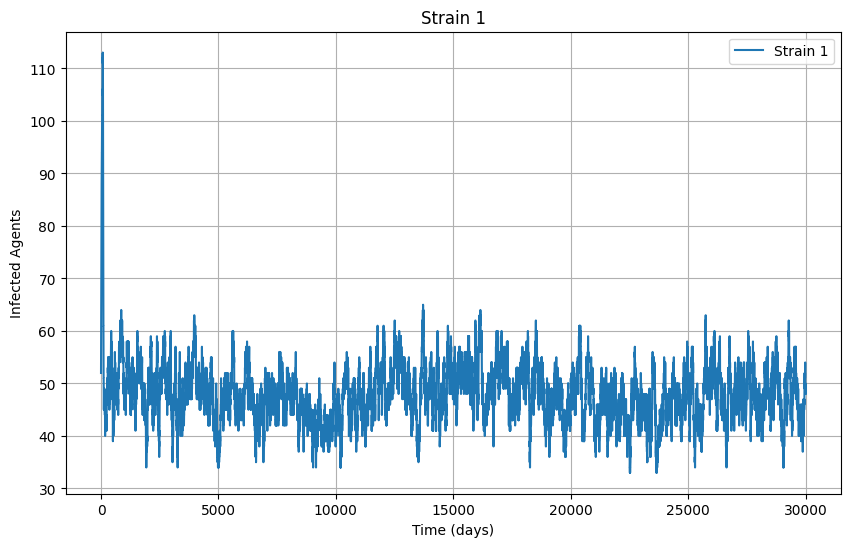

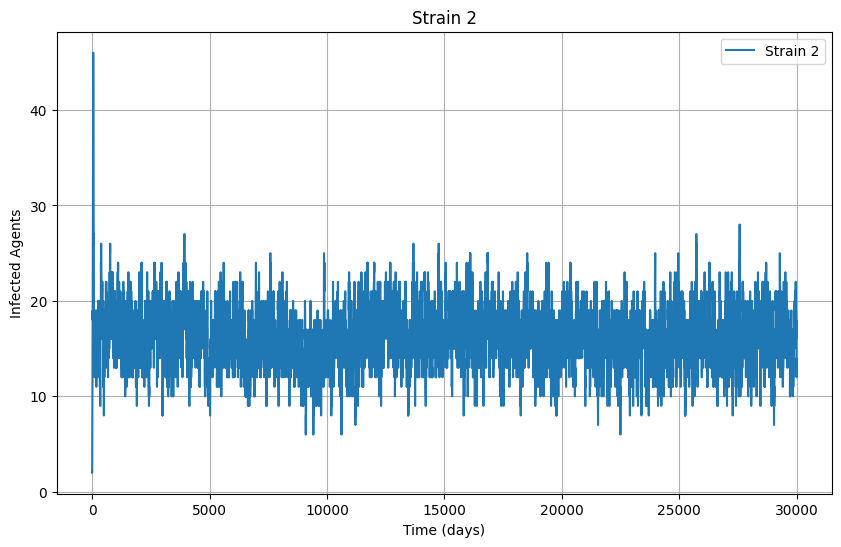

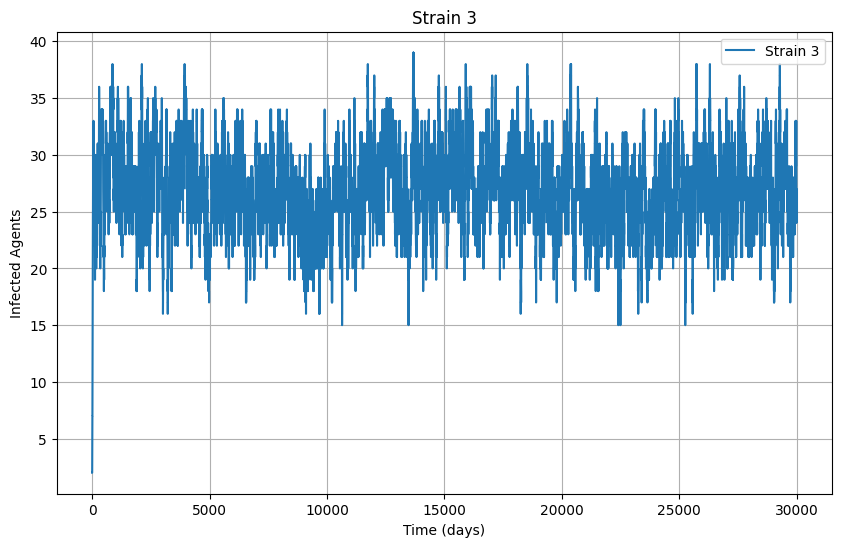

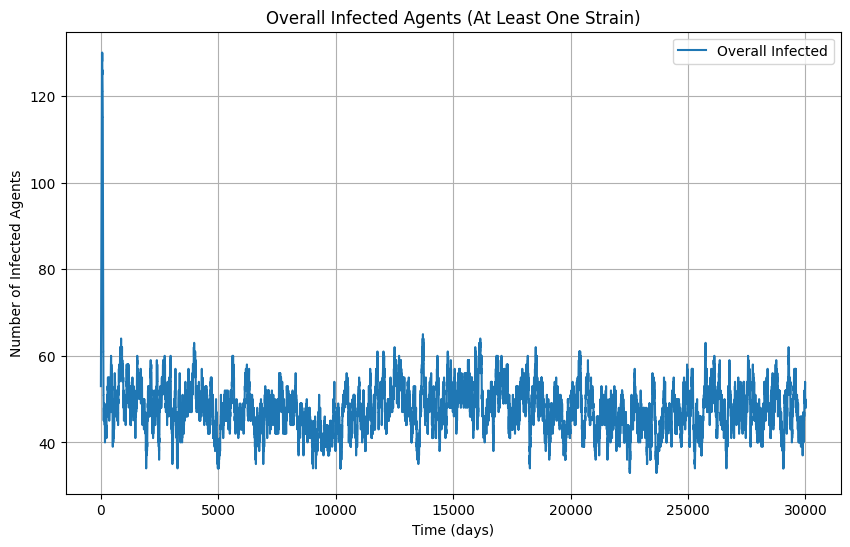

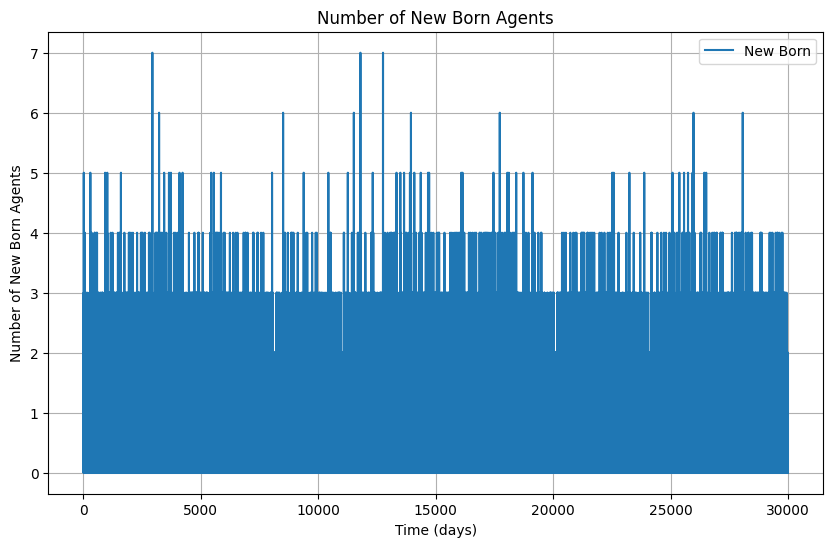

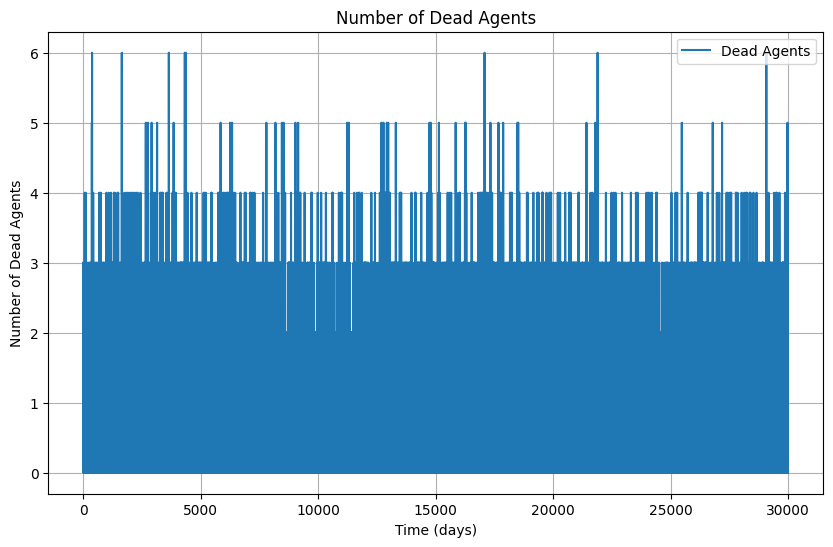

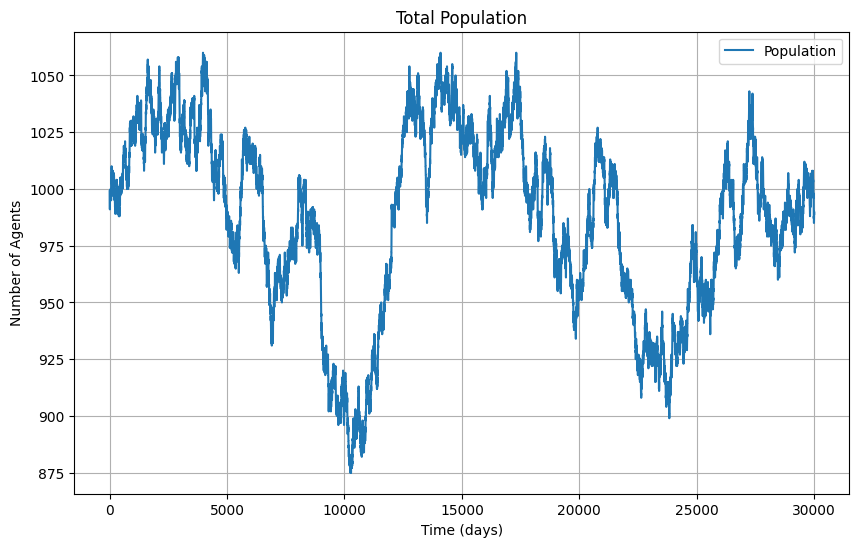

In [71]:
import matplotlib.pyplot as plt
agents = start_step(num_agents, num_strains, infected_at_start, infection_params, immunity_params, infection_probabilities)
number_of_interactions_per_day = int(len(agents) * number_of_interactions_per_day_per_agent // 2)
birth_pulse = 0
new_born = [0] * int(simulation_duration1)
deads = [0] * int(simulation_duration1)
population=[0] * int(simulation_duration1)# Lists to store infected counts for each strain and overall infected counts
overAll_infected = [[] for _ in range(num_strains)]
overall_infected_combined = []

for i in range(simulation_duration1):
    for j in range(number_of_interactions_per_day):
        index1, index2 = PickTwoAgentsWithContacts(len(agents))
        infect(agents[index1], agents[index2], infection_probabilities)

    birth_pulse += 1
    agents, num_new_agents, num_dead_agents = Birth_death(agents, birth_pulse, birth_rate_yearly, birth_interval, birth_duration, new_born, deads, carrying_capacity)
    deads[i] = num_dead_agents
    new_born[i] = num_new_agents
    population[i] = len(agents)

    # Update agents and get current infected counts for each strain
    agents, overall_infected_current, susceptibles = update_params(agents)

    # Accumulate infected counts for each strain
    for strain_index in range(num_strains):
        overAll_infected[strain_index].append(overall_infected_current[strain_index])

    # Calculate overall infected agents (infected in at least one strain)
    overall_infected_count = sum(1 for agent in agents if any(agent.infected))
    overall_infected_combined.append(overall_infected_count)

# Plotting each strain separately
for strain_index in range(num_strains):
    plt.figure(figsize=(10, 6))
    plt.plot(range(simulation_duration1), overAll_infected[strain_index], label=f'Strain {strain_index + 1}')
    plt.xlabel('Time (days)')
    plt.ylabel('Infected Agents')
    plt.title(f'Strain {strain_index + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting overall infected agents over time
plt.figure(figsize=(10, 6))
plt.plot(range(simulation_duration1), overall_infected_combined, label='Overall Infected')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected Agents')
plt.title('Overall Infected Agents (At Least One Strain)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting new born agents over time
plt.figure(figsize=(10, 6))
plt.plot(range(simulation_duration1), new_born, label='New Born')
plt.xlabel('Time (days)')
plt.ylabel('Number of New Born Agents')
plt.title('Number of New Born Agents')
plt.legend()
plt.grid(True)
plt.show()

# Plotting dead agents over time
plt.figure(figsize=(10, 6))
plt.plot(range(simulation_duration1), deads, label='Dead Agents')
plt.xlabel('Time (days)')
plt.ylabel('Number of Dead Agents')
plt.title('Number of Dead Agents')
plt.legend()
plt.grid(True)
plt.show()

# Plotting population over time
plt.figure(figsize=(10, 6))
plt.plot(range(simulation_duration1), population, label='Population')
plt.xlabel('Time (days)')
plt.ylabel('Number of Agents')
plt.title('Total Population')
plt.legend()
plt.grid(True)
plt.show()